In [1]:
# import all libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import percentile
from scipy import stats
import scipy.stats as scp

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Qn.1 Read the dataset to the python environment**

In [3]:
#Load the csv files into pandas dataframe
#Salesdata=pd.read_csv('/content/drive/My Drive/Colab Notebooks/.csv')
data=pd.read_excel('/content/drive/My Drive/Colab Notebooks/iris.xls')
data




,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


The given iris dataset contain the following information:
a) 50 samples each for 3 different species of iris (150 samples total)
b) Column features: sepal length, sepal width, petal length, petal width and classification

In [4]:
data.shape     # Dispaly the number of rows and columns in the dataset

(150, 5)

In [5]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
data.info()                   # Display the columns with datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
data.describe().T        # This is to display the statistical summary of the dataset

,count,mean,std,min,25%,50%,75%,max
SL,143.0,5.855944,0.828168,4.3,5.1,5.80,6.4,7.9
SW,144.0,3.049306,0.430644,2.0,2.8,3.00,3.3,4.4
PL,144.0,3.756250,1.761306,1.0,1.6,4.35,5.1,6.9
PW,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


The statistical summary displays the count,mean,standard deviation,minimum and maximum values for each column features and also(25%,50% and 75%) percentiles



#**Qn.2 Do necessary preprocessing steps**

**Check for null values**

In [9]:
data.isna().sum()                   #checking for null values present in the dataset

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

It is clear that null values are present in the dataset for the features 'SL','SW' and 'PL'.So we need preprocessing

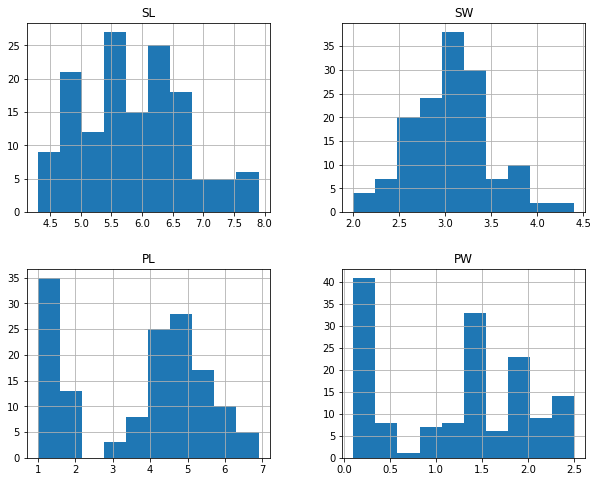

In [10]:
freqgraph = data.select_dtypes(include='float')   # Plotting the frequency graph to check the skewness
freqgraph.hist(figsize=(10,8))
plt.show()

By observing the frequency plots median seems the best fit for filling the missing values.


In [11]:
for i in ['SL', 'SW', 'PL']:                             # Null values are filled using for loop function    
    data[i]=data[i].fillna(data[i].median())                                                     

In [ ]:
data.isna().sum()                      # Checking for null values after filling missing values using median

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Now it is clear that all the missing values in the features are filled

**Check for ouliers present in the dataset**

First we need to plot boxplot for identifying outliers

Text(0.5, 1.0, 'Box plot of SL')

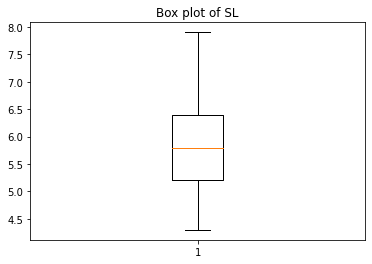

In [12]:
plt.boxplot(data['SL'])
plt.title('Box plot of SL')

Here, there are no outliers

Text(0.5, 1.0, 'Box plot of SW')

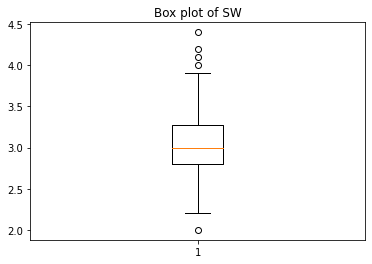

In [13]:
plt.boxplot(data['SW'])
plt.title('Box plot of SW')

Here, we can see some outliers.So we have to find quartile values for the feature 'SW'

In [14]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')

In [15]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [16]:
IQR=Q3-Q1      # Calculate the interquartile range
Low_lim=Q1-1.5*IQR  # Calculte the lower limit
Up_lim=Q3+1.5*IQR   # Calculate the upper limit
print(Low_lim)
print(Up_lim)

2.1249999999999996
3.9250000000000003


From IQR we can find the lower limit and upper limit and we can remove values below lower limit and above upper limit.So here we can remove all the values greater than 3.925 and lesser than 2.124

In [17]:
outlier=[]
for x in data['SW']:
    if((x>Up_lim) or (x<Low_lim)):  
       outlier.append(x)

This will create an empty list outlier and checking conditions of upper limit or lower limit and append those values to outlier list.

In [18]:
outlier    # This will display the outliers

[4.0, 4.4, 4.1, 4.2, 2.0]

Next is to find the index values of these outliers.

In [19]:
ind1=data['SW']>Up_lim
data.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [20]:
data.drop([14, 15, 32, 33],inplace=True)   # This will drop the index values which is in the outlier list

Text(0.5, 1.0, 'Box plot of SW')

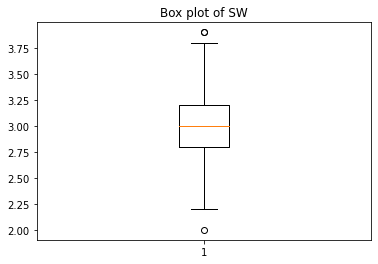

In [21]:
plt.boxplot(data['SW'])
plt.title('Box plot of SW')

Now we can see that outliers are removed

Text(0.5, 1.0, 'Box plot of PL')

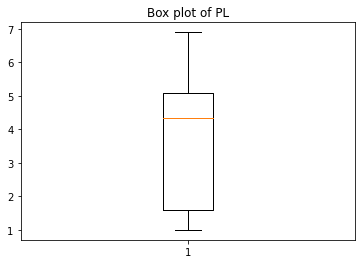

In [22]:
plt.boxplot(data['PL'])
plt.title('Box plot of PL')

No outliers are present here

Text(0.5, 1.0, 'Box plot of PW')

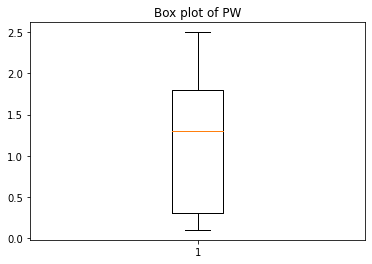

In [23]:
plt.boxplot(data['PW'])
plt.title('Box plot of PW')

No outliers are present here

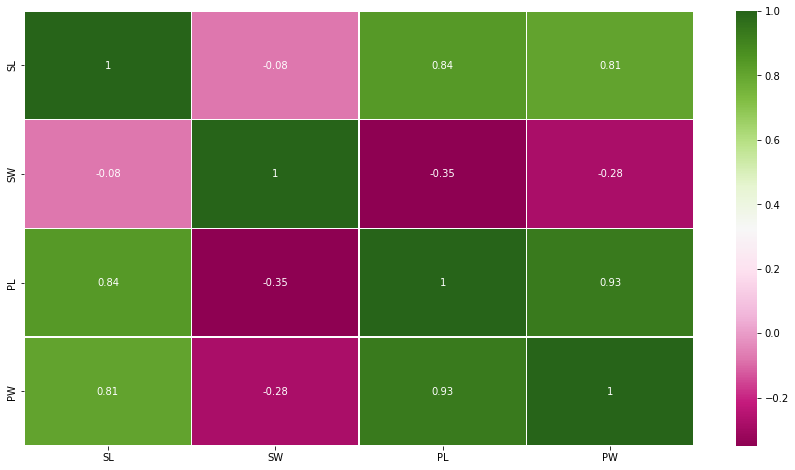

In [24]:
Corr=data.corr()                          # Plotting correlation matrix        
plt.subplots(figsize=(15,8))
sns.heatmap(Corr,annot=True,linewidth=0.5,cmap='PiYG')

Here,on observing correlation heat map we can see that column features 

#**Qn.3 Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)**

In [25]:
x=data.drop(['Classification'],axis=1)    # assigning variables
y=data['Classification']                  # Assigning target variable

In [26]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

# Logistic Regression Modeling

In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred = logit_model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [84]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print("Accuracy is:", accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy is: 0.9333333333333333


array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]])

Accuracy is aroung 93.33

# KNN Modeling

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [70]:
x=data.drop(['Classification'],axis=1)    
y=data['Classification']     
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.25)
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,13,2)         # optimum k value is choosen as the square root of the number of datapoints
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)             

Text(0, 0.5, 'accuracy')

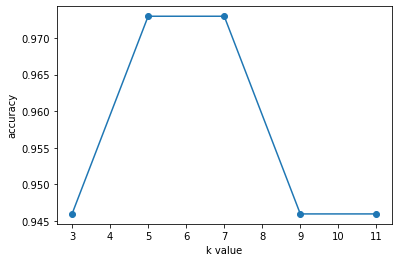

In [71]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [72]:
acc_values

[0.9459459459459459,
 0.972972972972973,
 0.972972972972973,
 0.9459459459459459,
 0.9459459459459459]

In [73]:
classifier=KNeighborsClassifier(n_neighbors=8,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)  
print('Accuracy is', accuracy_score(y_test,y_pred))

Accuracy is 0.9459459459459459


Accuracy is .945

# Decision Tree Algorithm

In [75]:
x=data.drop(['Classification'],axis=1)    
y=data['Classification']     
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.25)
from sklearn.tree import DecisionTreeClassifier
data_model= DecisionTreeClassifier()
data_model.fit(x_train,y_train)
y_pred=data_model.predict(x_test)

In [76]:
print("Accuracy is :",accuracy_score(y_test,y_pred))

Accuracy is : 0.9459459459459459


# Support vector machine algorithm

In [85]:
x=data.drop(['Classification'],axis=1)    
y=data['Classification']     
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear')     #SVM Linear
svm_linear.fit(x_train,y_train)
y_pred = svm_linear.predict(x_test)

In [ ]:
print("Accuracy using Linear model",accuracy_score(y_test,y_pred))

Accuracy using Linear model 0.9666666666666667


In [ ]:
x=data.drop(['Classification'],axis=1)    
y=data['Classification']     
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
from sklearn.svm import SVC
svm_linear = SVC(kernel='poly',degree=3)     #SVM Polynomial
svm_linear.fit(x_train,y_train)
y_pred = svm_linear.predict(x_test)

In [ ]:
print("Accuracy using Linear model",accuracy_score(y_test,y_pred))

Accuracy using Linear model 0.9666666666666667


In [ ]:
svm_rbf = SVC(kernel='rbf')                   #SVM RBF(Radial Basis Function)
svm_rbf.fit(x_train,y_train)
y_pred=svm_rbf.predict(x_test)

In [ ]:
print("Accuracy using Linear model",accuracy_score(y_test,y_pred))

Accuracy using Linear model 0.9666666666666667


# BUILD random forest algorithm

In [86]:
x=data.drop(['Classification'],axis=1)    
y=data['Classification']     
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [87]:
print("Accuracy using Linear model",accuracy_score(y_test,y_pred))

Accuracy using Linear model 0.9333333333333333


The prediction went well with suport vector machine algorithm out of all the several algorithms tested